In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
data = pd.read_csv('housing.csv')

In [254]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [255]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value'] 

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [257]:
train_data = X_train.join(Y_train)

In [258]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19898,-119.25,36.27,23.0,1494.0,275.0,678.0,235.0,2.6875,INLAND,69100.0
13066,-121.32,38.54,13.0,4715.0,1090.0,2420.0,1059.0,2.9693,INLAND,104400.0
10906,-117.85,33.74,19.0,1248.0,357.0,1214.0,328.0,2.7059,<1H OCEAN,159800.0
5881,-118.33,34.16,37.0,2381.0,575.0,1235.0,499.0,3.7941,<1H OCEAN,247800.0
8006,-118.10,33.85,36.0,956.0,159.0,416.0,157.0,4.6429,<1H OCEAN,223700.0
...,...,...,...,...,...,...,...,...,...,...
17442,-120.46,34.66,5.0,2904.0,702.0,1302.0,618.0,3.0081,NEAR OCEAN,135200.0
11789,-121.23,38.79,45.0,907.0,176.0,463.0,190.0,2.2292,INLAND,92000.0
9404,-122.54,37.88,30.0,4382.0,732.0,1775.0,745.0,6.7809,NEAR BAY,414400.0
374,-122.15,37.74,43.0,1383.0,275.0,853.0,272.0,3.5083,NEAR BAY,122000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

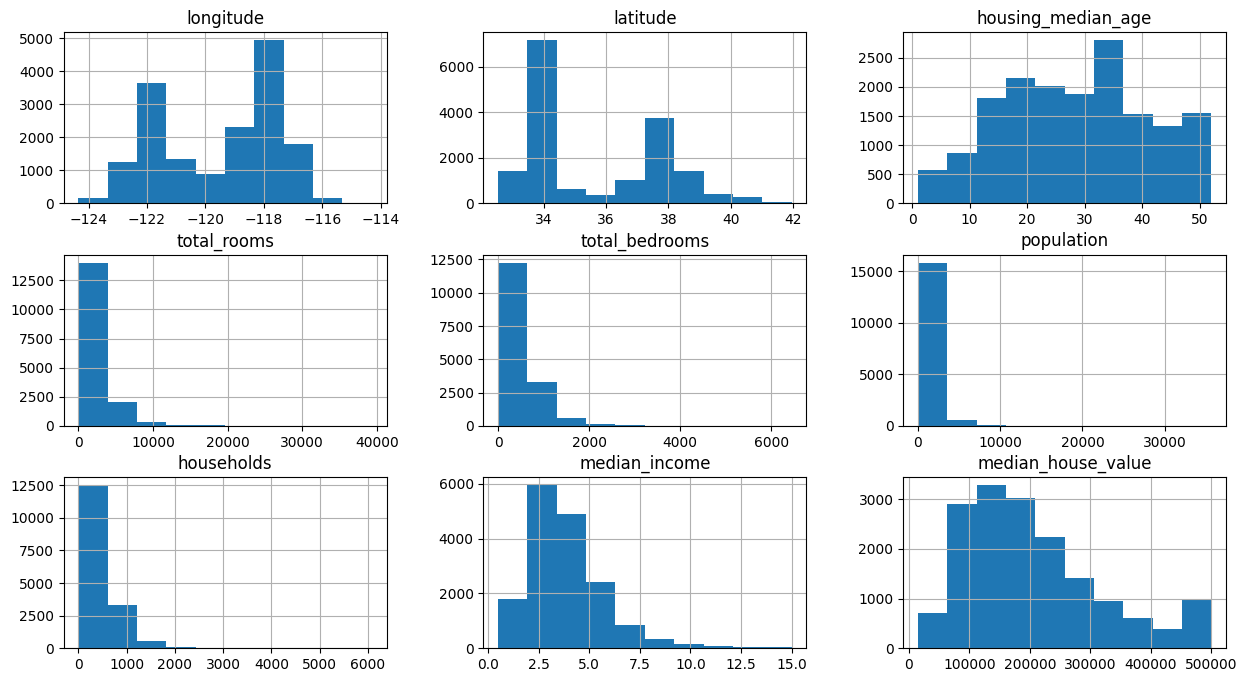

In [259]:
train_data.hist(figsize=(15,8))

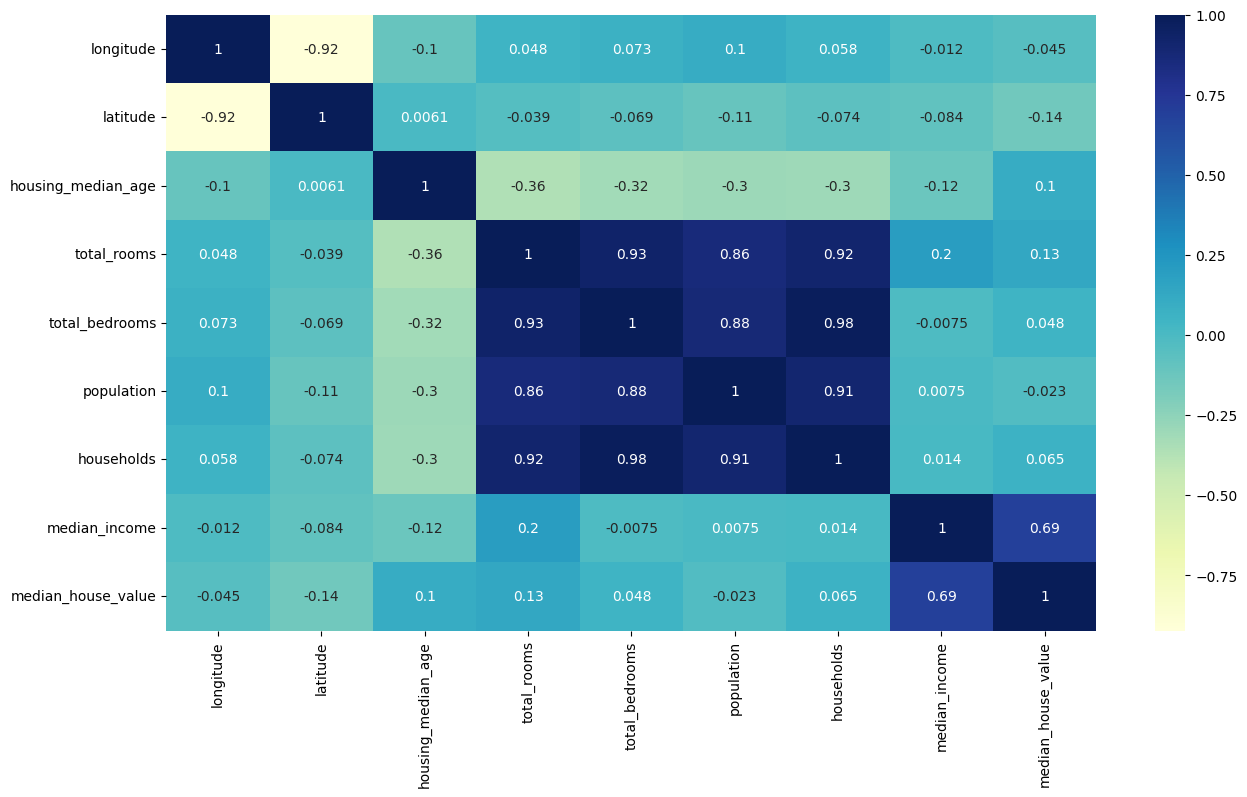

In [260]:
numeric_data = train_data.select_dtypes(include=[float, int])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [261]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

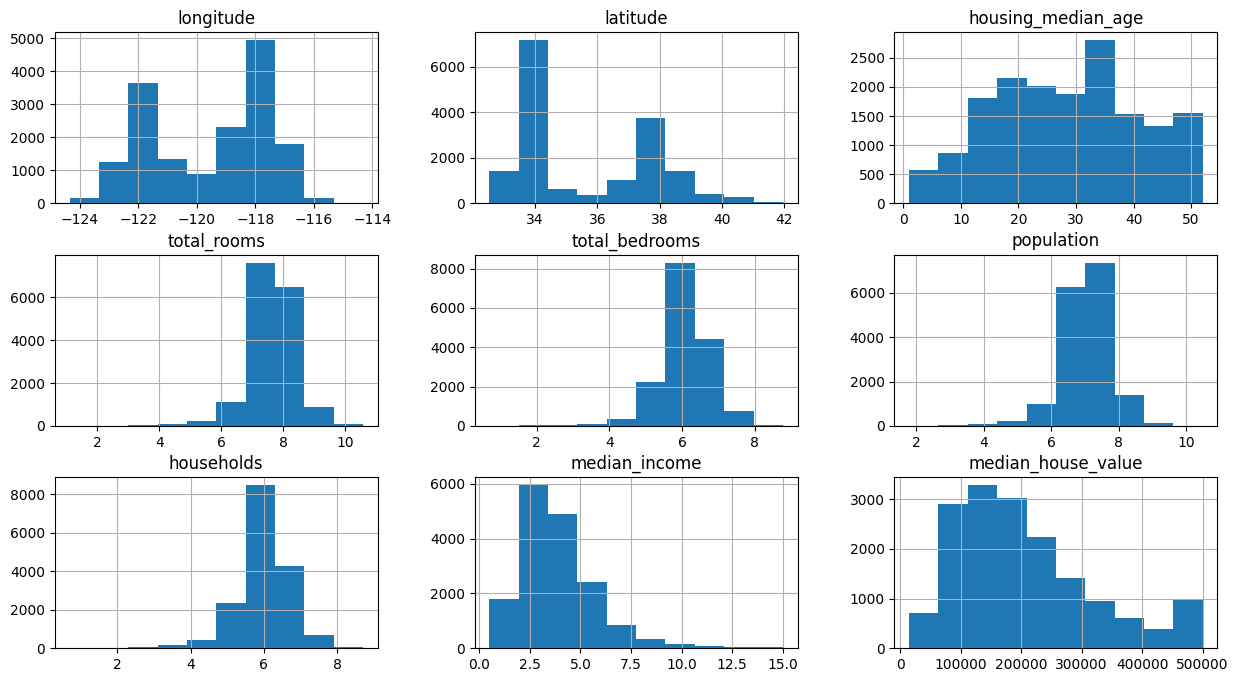

In [262]:
train_data.hist(figsize=(15, 8))

In [263]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], prefix='proximity')).drop(['ocean_proximity'], axis=1)

In [264]:
proximity_columns = ['proximity_<1H OCEAN', 'proximity_INLAND', 'proximity_ISLAND', 'proximity_NEAR BAY', 'proximity_NEAR OCEAN']
train_data[proximity_columns] = train_data[proximity_columns].astype(int)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN
19898,-119.25,36.27,23.0,7.309881,5.620401,6.520621,5.463832,2.6875,69100.0,0,1,0,0,0
13066,-121.32,38.54,13.0,8.458716,6.994850,7.791936,6.966024,2.9693,104400.0,0,1,0,0,0
10906,-117.85,33.74,19.0,7.130099,5.880533,7.102499,5.796058,2.7059,159800.0,1,0,0,0,0
5881,-118.33,34.16,37.0,7.775696,6.356108,7.119636,6.214608,3.7941,247800.0,1,0,0,0,0
8006,-118.10,33.85,36.0,6.863803,5.075174,6.033086,5.062595,4.6429,223700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,-120.46,34.66,5.0,7.974189,6.555357,7.172425,6.428105,3.0081,135200.0,0,0,0,0,1
11789,-121.23,38.79,45.0,6.811244,5.176150,6.139885,5.252273,2.2292,92000.0,0,1,0,0,0
9404,-122.54,37.88,30.0,8.385489,6.597146,7.482119,6.614726,6.7809,414400.0,0,0,0,1,0
374,-122.15,37.74,43.0,7.232733,5.620401,6.749931,5.609472,3.5083,122000.0,0,0,0,1,0


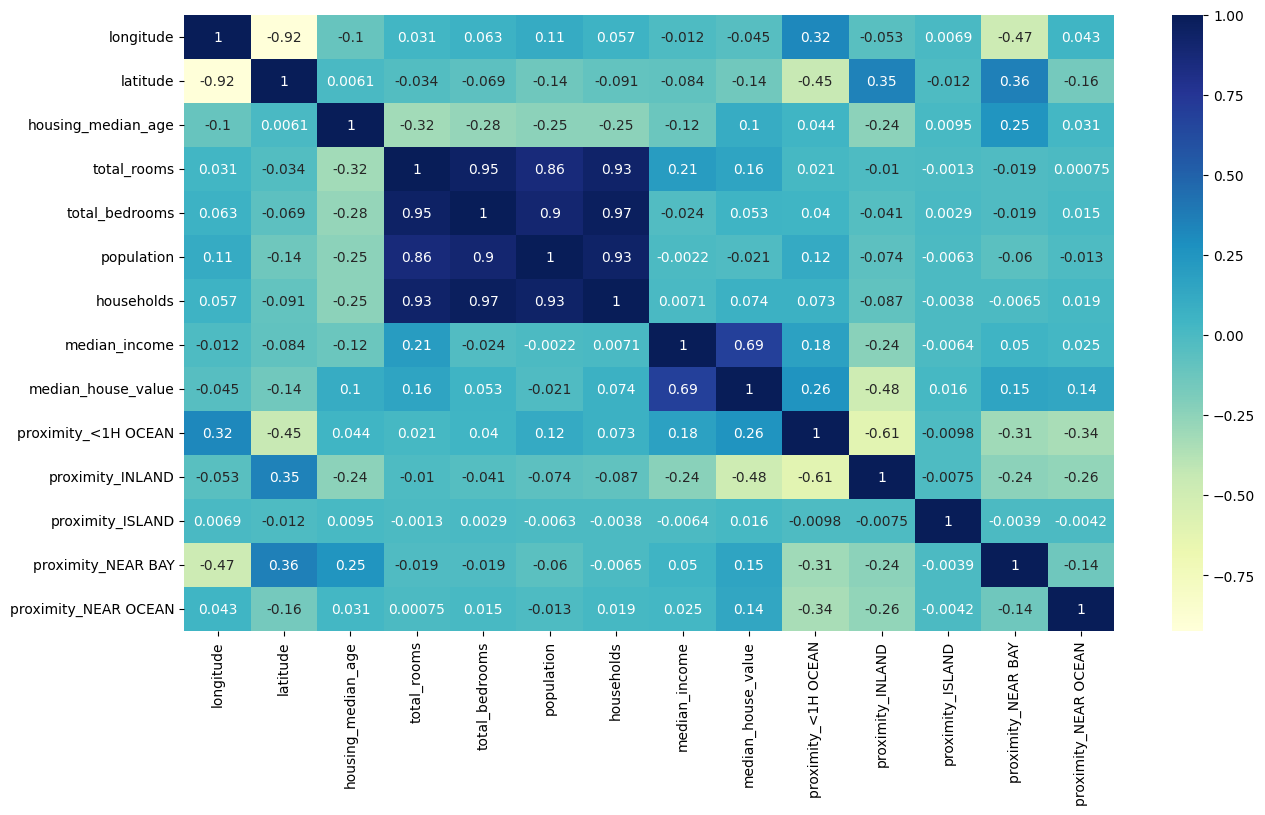

In [265]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

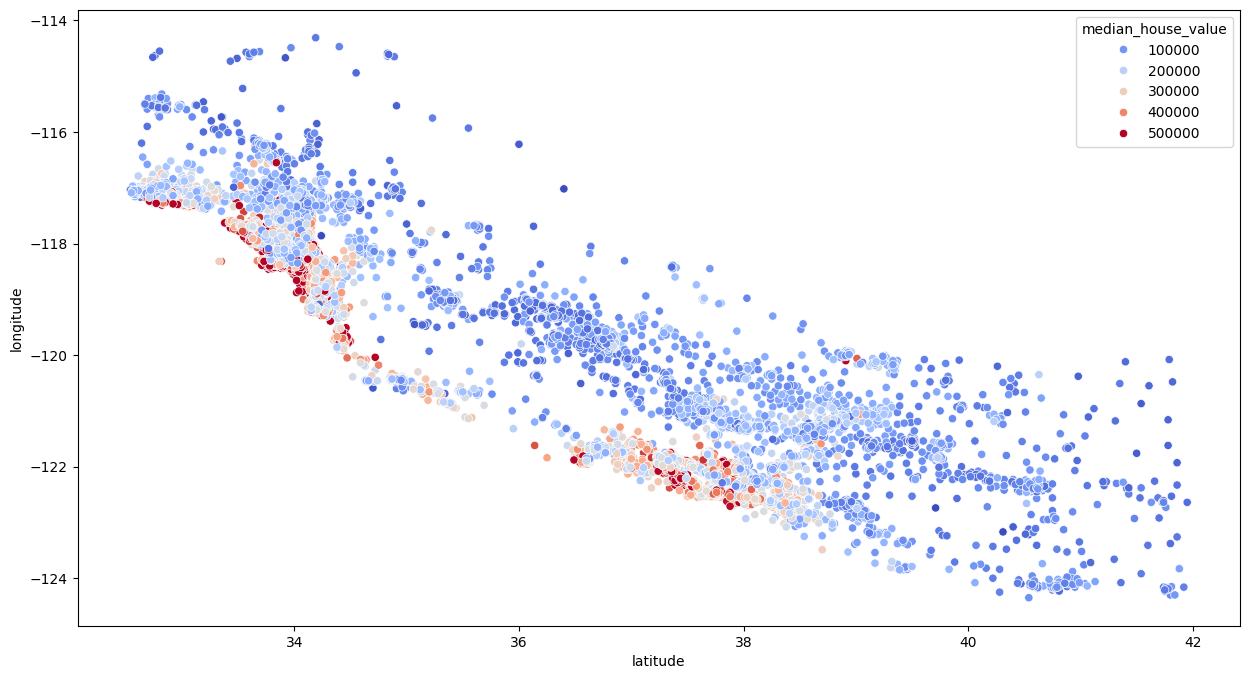

In [266]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [267]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

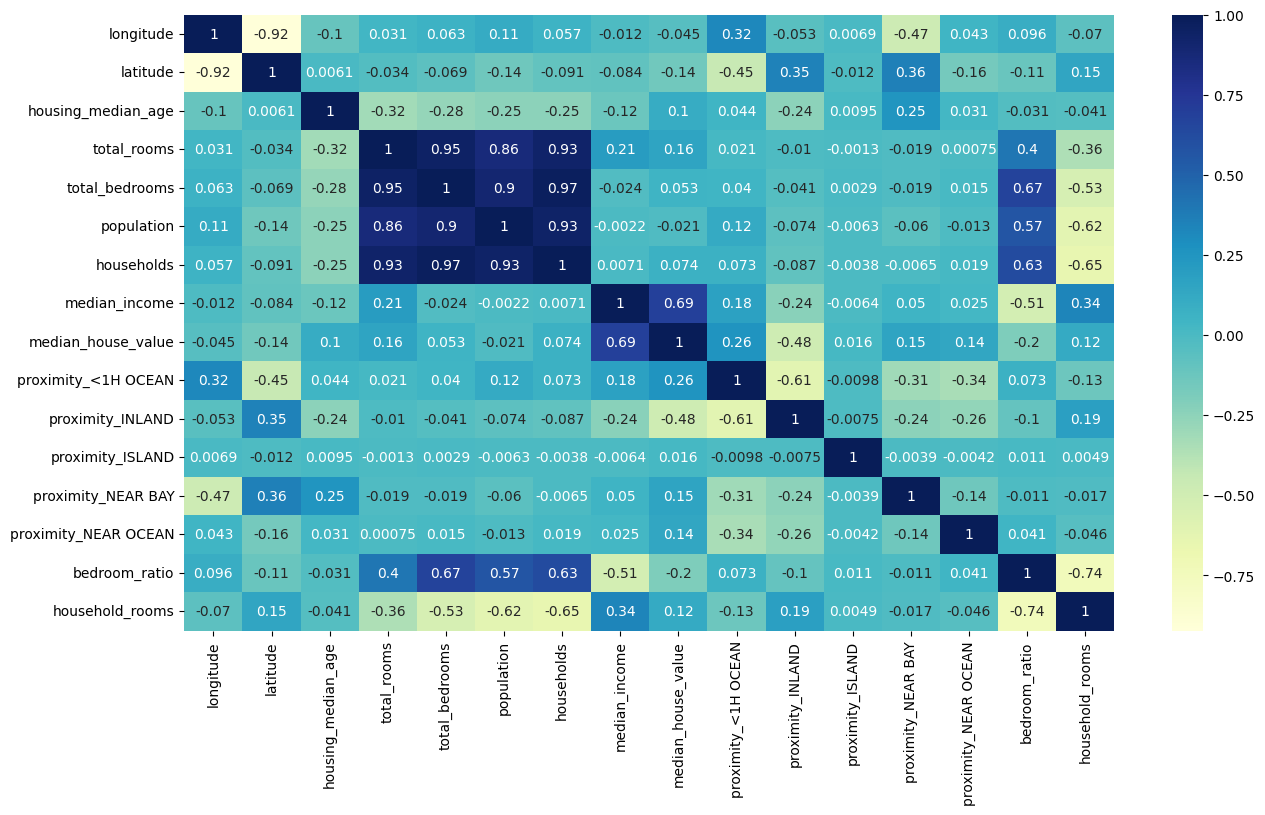

In [268]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

X_train = train_data.drop(['median_house_value'], axis=1)
Y_train = train_data['median_house_value']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, Y_train)


LinearRegression()

In [270]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], prefix='proximity')).drop(['ocean_proximity'], axis=1)

expected_columns = ['proximity_<1H OCEAN', 'proximity_INLAND', 'proximity_ISLAND', 'proximity_NEAR BAY', 'proximity_NEAR OCEAN']
for col in expected_columns:
    if col not in test_data.columns:
        test_data[col] = 0

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,bedroom_ratio,household_rooms
19004,-121.96,38.32,12.0,8.542471,6.906755,7.919356,6.884487,4.0458,130600.0,False,True,False,False,False,0.808520,1.240829
14029,-117.15,32.75,9.0,7.944137,6.711740,6.747587,6.320768,2.6181,204200.0,False,False,False,False,True,0.844867,1.256831
8491,-118.30,33.90,29.0,7.870166,6.505784,7.533159,6.473891,3.6000,208800.0,True,False,False,False,False,0.826639,1.215678
10406,-117.59,33.66,3.0,7.095893,5.549076,6.335054,5.662960,5.1589,167800.0,True,False,False,False,False,0.782012,1.253036
16310,-121.33,38.01,27.0,7.385851,5.459586,6.447306,5.545177,5.3180,155100.0,False,True,False,False,False,0.739195,1.331941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17000,-122.26,37.56,23.0,8.893435,7.202661,8.131531,7.169350,5.6683,391000.0,False,False,False,True,False,0.809885,1.240480
20036,-118.93,36.10,19.0,8.002694,6.525030,7.411556,6.357842,2.3792,90000.0,False,True,False,False,False,0.815354,1.258712
11777,-121.27,38.75,43.0,7.164720,5.730100,6.473891,5.521461,2.7188,85300.0,False,True,False,False,False,0.799766,1.297613
19158,-122.70,38.35,16.0,7.192182,5.236442,6.410175,5.288267,5.0366,257800.0,True,False,False,False,False,0.728074,1.360026


In [276]:
proximity_columns = ['proximity_<1H OCEAN', 'proximity_INLAND', 'proximity_ISLAND', 'proximity_NEAR BAY', 'proximity_NEAR OCEAN']
test_data[proximity_columns] = test_data[proximity_columns].astype(int)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,proximity_<1H OCEAN,proximity_INLAND,proximity_ISLAND,proximity_NEAR BAY,proximity_NEAR OCEAN,bedroom_ratio,household_rooms
19004,-121.96,38.32,12.0,8.542471,6.906755,7.919356,6.884487,4.0458,130600.0,0,1,0,0,0,0.808520,1.240829
14029,-117.15,32.75,9.0,7.944137,6.711740,6.747587,6.320768,2.6181,204200.0,0,0,0,0,1,0.844867,1.256831
8491,-118.30,33.90,29.0,7.870166,6.505784,7.533159,6.473891,3.6000,208800.0,1,0,0,0,0,0.826639,1.215678
10406,-117.59,33.66,3.0,7.095893,5.549076,6.335054,5.662960,5.1589,167800.0,1,0,0,0,0,0.782012,1.253036
16310,-121.33,38.01,27.0,7.385851,5.459586,6.447306,5.545177,5.3180,155100.0,0,1,0,0,0,0.739195,1.331941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17000,-122.26,37.56,23.0,8.893435,7.202661,8.131531,7.169350,5.6683,391000.0,0,0,0,1,0,0.809885,1.240480
20036,-118.93,36.10,19.0,8.002694,6.525030,7.411556,6.357842,2.3792,90000.0,0,1,0,0,0,0.815354,1.258712
11777,-121.27,38.75,43.0,7.164720,5.730100,6.473891,5.521461,2.7188,85300.0,0,1,0,0,0,0.799766,1.297613
19158,-122.70,38.35,16.0,7.192182,5.236442,6.410175,5.288267,5.0366,257800.0,1,0,0,0,0,0.728074,1.360026


In [277]:
reg.score(X_test, Y_test)

0.6675526986590443